In [ ]:
pip install google-api-python-client pandas nltk transformers vaderSentiment tabulate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.9 MB/s eta 0:00:00


# Upload Libraries

In [ ]:
from googleapiclient.discovery import build
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from google.colab import drive
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from textblob import TextBlob
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from transformers import pipeline
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import PCA

drive.mount('/content/drive')


Mounted at /content/drive


# Data Exploration

In [34]:
#Read the consolidated data to start the analysis

data = pd.read_csv('/content/drive/My Drive/Social Media Project-Yosr Bouhoula-903432/consolidated_data.csv')
data.head()

,video_id,video_timestamp,title,description,playlist,comment_id,comment_author,comment_text,comment_likes,comment_timestamp,reply_author,reply_text,reply_likes,reply_timestamp
0,pGzXezBqcEc,2025-01-17 10:58:00+00:00,Israeli PM confirms Gaza hostage release deal ...,Israeli Prime Minister Benjamin Netanyahu has ...,BBC_Playlist,Ugx6HOyZSk9gTq84Tzp4AaABAg,@aliuddin5485,"No they haven’t, it’s yet to be voted on.<br><...",0,2025-01-17T12:06:12Z,NaN,NaN,NaN,NaN
1,pGzXezBqcEc,2025-01-17 10:58:00+00:00,Israeli PM confirms Gaza hostage release deal ...,Israeli Prime Minister Benjamin Netanyahu has ...,BBC_Playlist,UgwtBzwKXxhiHdkLtNJ4AaABAg,@AsneAsne-m1u,Satanyahu will probably change his mind by tom...,0,2025-01-17T12:05:51Z,NaN,NaN,NaN,NaN
2,pGzXezBqcEc,2025-01-17 10:58:00+00:00,Israeli PM confirms Gaza hostage release deal ...,Israeli Prime Minister Benjamin Netanyahu has ...,BBC_Playlist,UgzFsZClx80jTn6sINt4AaABAg,@geoms6263,ICC is waiting. Not one brave person in Israel...,0,2025-01-17T12:03:46Z,NaN,NaN,NaN,NaN
3,pGzXezBqcEc,2025-01-17 10:58:00+00:00,Israeli PM confirms Gaza hostage release deal ...,Israeli Prime Minister Benjamin Netanyahu has ...,BBC_Playlist,UgzrAnn9w2UuQyS9_b94AaABAg,@Rany-uJesus,🌏🌐✋👈<br>God bless you 👍,0,2025-01-17T12:03:09Z,NaN,NaN,NaN,NaN
4,pGzXezBqcEc,2025-01-17 10:58:00+00:00,Israeli PM confirms Gaza hostage release deal ...,Israeli Prime Minister Benjamin Netanyahu has ...,BBC_Playlist,UgxKXwJIP3XrUR8zmUF4AaABAg,@DeanaGooding-i5p,Thank goodness their gonna free them they&#39;...,0,2025-01-17T12:02:56Z,NaN,NaN,NaN,NaN


In [ ]:
data.columns

Index(['video_id', 'video_timestamp', 'title', 'description', 'playlist',
       'comment_id', 'comment_author', 'comment_text', 'comment_likes',
       'comment_timestamp', 'reply_author', 'reply_text', 'reply_likes',
       'reply_timestamp'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10121 entries, 0 to 10120
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   video_id           10121 non-null  object 
 1   video_timestamp    10121 non-null  object 
 2   title              10121 non-null  object 
 3   description        10050 non-null  object 
 4   playlist           10121 non-null  object 
 5   comment_id         10121 non-null  object 
 6   comment_author     10115 non-null  object 
 7   comment_text       10121 non-null  object 
 8   comment_likes      10121 non-null  int64  
 9   comment_timestamp  10121 non-null  object 
 10  reply_author       1766 non-null   object 
 11  reply_text         1773 non-null   object 
 12  reply_likes        1775 non-null   float64
 13  reply_timestamp    1775 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
#For full display of comments
pd.set_option('display.max_colwidth', None)

In [ ]:
#Explore the 10 most liked comments
most_liked_comments = data.drop_duplicates(subset='comment_text').sort_values(by='comment_likes', ascending=False).head(10)

print("\nTop 10 Most Liked Comments:")
most_liked_comments[['comment_author', 'comment_text', 'comment_likes', 'title']]



Top 10 Most Liked Comments:


,comment_author,comment_text,comment_likes,title
4516,@OsamahMoco,"I started my first job in 1985 and a few years later, I set the goal to have $1 million saved by the time I retired. I&#39;m 3 years from retirement and hit that goal last year, but I now know I should have moved that goal post further out to $1.5 million or more.<br>I remember as a kid thinking millionaires were these people who lived like demi-gods among all us serfs. Now I am one and still don&#39;t feel any different from a serf.",196,How US election could change state of the world | BBC News
7348,@aljazeeraenglish,"Thanks for tuning in. Share your thoughts with us in the comments below. Please note that hateful and inappropriate comments will be removed. <br><br>Subscribe to our channel: <a href=""http://bit.ly/AJSubscribe"">http://bit.ly/AJSubscribe</a><br>Follow us on X: <a href=""https://twitter.com/AJEnglish"">https://twitter.com/AJEnglish</a><br>Find us on Facebook: <a href=""https://www.facebook.com/aljazeera"">https://www.facebook.com/aljazeera</a><br>Check our website: <a href=""https://www.aljazeera.com/"">https://www.aljazeera.com/</a><br>Check out our Instagram page: <a href=""https://www.instagram.com/aljazeeraenglish/"">https://www.instagram.com/aljazeeraenglish/</a><br>Download AJE Mobile App: <a href=""https://aje.io/AJEMobile"">https://aje.io/AJEMobile</a>",105,Gaza’s Al Shifa hospital revisited | Featured Documentary
7059,@elenasarita,Free the world from US international politics,101,Trump vs Harris: Ending the war on Gaza | Pinch Point
7547,@Farhajamalk,"To be honest, I have more sympathy to the suffering people in Congo and Sudan than to people of Gaza who celebrated the massacre on 7th oct",75,Israel's northern Gaza siege: Thousands of Palestinians flee Jabalia to Gaza City
3884,@offlimits_wrld,Israel just made the mainstream cry🇮🇱,73,Hezbollah media chief killed in Israeli strike in Beirut | BBC News
3093,@amalahmed9923,What about the innocent Palestinian hostages in Israel prisons ?,71,"Israel-Gaza ceasefire talks 'in final phase', negotiator says | BBC News"
1759,@FloraJames-c7o,"THANK YOU for continuing to update🙏I prefer to trade with Bitcoin in this economic crisis because it is more profitable I earn an average of $34,840 per week even though I barely do any business",68,UN warns Gaza aid work at 'breaking point' | BBC News
5950,@akpewebiakolo7517,A two minutes report by Aljazerra without mentioning Hamas who is one of the main actors in the current conflict 😂😢,68,Dozens killed in Israeli attack on northern Gaza’s Beit Lahiya
8297,@oscaralison,PALESTINE you have touch the hearts of many.,68,Music in solidarity and protest: Artists beyond Arab diaspora shine spotlight on Gaza
8926,@jamese3114,Antizionism is not antisemitism.,63,France divided: Tension among Muslim and Jewish communities


In [ ]:
#What the dataset contains
video_counts = data.groupby('playlist')['video_id'].nunique()
comment_counts = data.groupby('playlist')['comment_id'].count()
reply_counts = data[data['reply_author'].notna()].groupby('playlist')['reply_author'].count()

summary_table = pd.DataFrame({
    'Unique Videos': video_counts,
    'Total Comments': comment_counts,
    'Total Replies': reply_counts
}).reset_index()

summary_table

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,playlist,Unique Videos,Total Comments,Total Replies
0,Al_Jazeera_Playlist,50,4295,183
1,BBC_Playlist,49,5826,1583


In [ ]:
#Convert published_at columns to datetime
data['comment_published_at'] = pd.to_datetime(data['comment_timestamp'])
data['video_published_at'] = pd.to_datetime(data['video_timestamp'])

#Comments over time
videos_over_time = data.groupby(data['video_published_at'].dt.date).size()
print("\nVideos Over Time:")
print(videos_over_time)



Videos Over Time:
video_published_at
2024-10-09    560
2024-10-10    906
2024-10-11    192
2024-10-12    915
2024-10-13    200
2024-10-14    372
2024-10-15    315
2024-10-16    160
2024-10-17    229
2024-10-20    304
2024-10-21    368
2024-10-22    100
2024-10-23    200
2024-10-24    104
2024-10-25    103
2024-10-29    106
2024-10-30    115
2024-11-01    104
2024-11-03    100
2024-11-05    160
2024-11-06    205
2024-11-10    100
2024-11-11    100
2024-11-12    102
2024-11-13    101
2024-11-18    219
2024-11-21    102
2024-11-26    100
2024-11-28    100
2024-12-08    107
2024-12-12    105
2024-12-17    233
2024-12-18    240
2024-12-20    100
2024-12-22    127
2024-12-27    100
2024-12-28    105
2024-12-31    162
2025-01-06    236
2025-01-07    210
2025-01-10    103
2025-01-13    351
2025-01-14    218
2025-01-15    476
2025-01-16    393
2025-01-17    113
dtype: int64


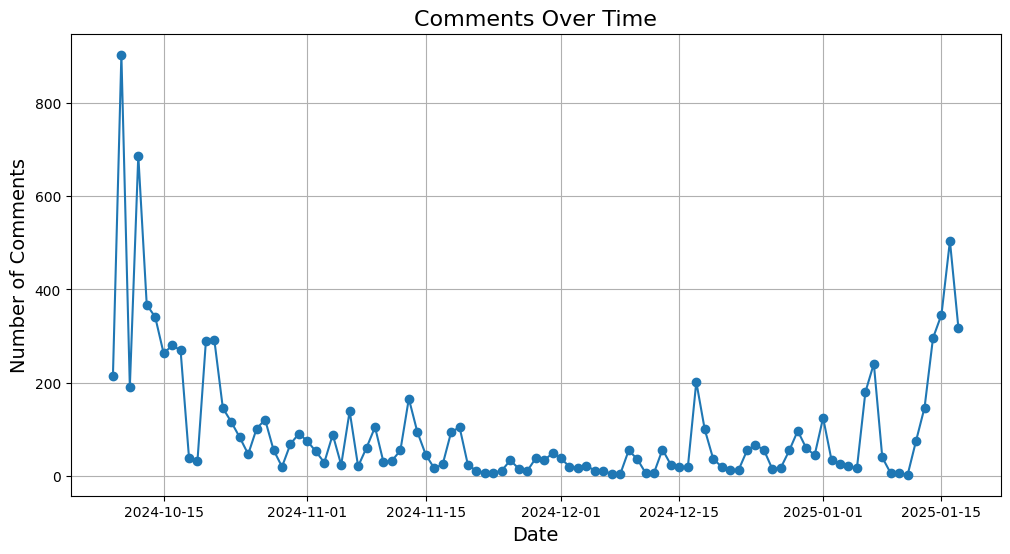

In [ ]:
#Group comments by date
comments_over_time = data.groupby(data['comment_published_at'].dt.date).size()
plt.figure(figsize=(12, 6))
plt.plot(comments_over_time.index, comments_over_time.values, marker='o')
plt.title('Comments Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Comments', fontsize=14)
plt.grid(True)
plt.show()


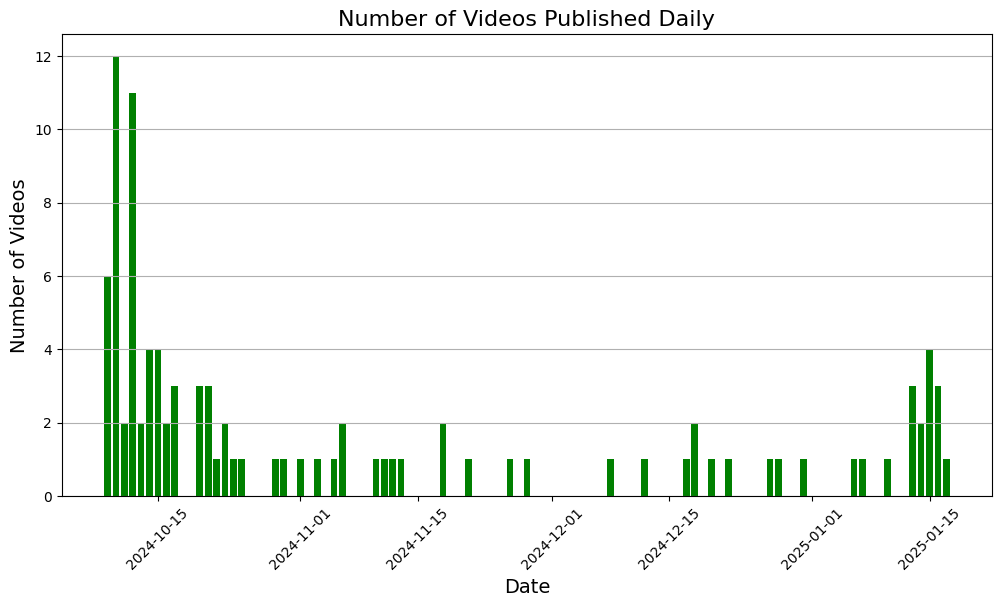

In [ ]:
#Group videos by date
videos_published_daily = data.groupby(data['video_published_at'].dt.date)['video_id'].nunique()
plt.figure(figsize=(12, 6))
plt.bar(videos_published_daily.index, videos_published_daily.values, color='green')
plt.title('Number of Videos Published Daily', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Videos', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


 The Israel Defense Forces (IDF) bombed Rufaida school-turned-shelter in Deir al-Balah in the central Gaza Strip. The airstrikes killed at least 28 Palestinians and injured more than 54. The IDF did not issue a warning before striking the school.

In [ ]:
#Find the date with the most comments
peak_date = comments_over_time.idxmax()
print(f"Peak Date for Comments: {peak_date}")

#Filter videos published on or before the peak date
trigger_videos = data[data['comment_published_at'].dt.date == peak_date]

#Top videos by comments on the peak date
trigger_videos_grouped = trigger_videos.groupby('title').size().reset_index(name='comment_count')
trigger_videos_grouped = trigger_videos_grouped.sort_values(by='comment_count', ascending=False)

print("\nTop Trigger Videos on Peak Date:")
print(trigger_videos_grouped)



Peak Date for Comments: 2024-10-10

Top Trigger Videos on Peak Date:
                                                                                              title  \
13                   Recognising Palestine statehood: Diplomatic shifts against the backdrop of war   
4                                        Europe against war: Protesters march to demand a ceasefire   
16                                    US lied on aid and ceasefire, Blinken spun it: Marwan Bishara   
2                                Biden speaks with Netanyahu, pledges ‘ironclad’ support for Israel   
12                        One year of the war on Gaza: Unpacking UN top court's case against Israel   
11                                          One Year of Israel’s War on Gaza: Unwavering US Support   
14                        Shifts in US public opinion: Survey suggests growing opposition to Israel   
5                                       France divided: Tension among Muslim and Jewish communities   
15  

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



              playlist  Total_Comments  Total_Replies  Total_Engagement
0  Al_Jazeera_Playlist            4295            183              4478
1         BBC_Playlist            5826           1583              7409


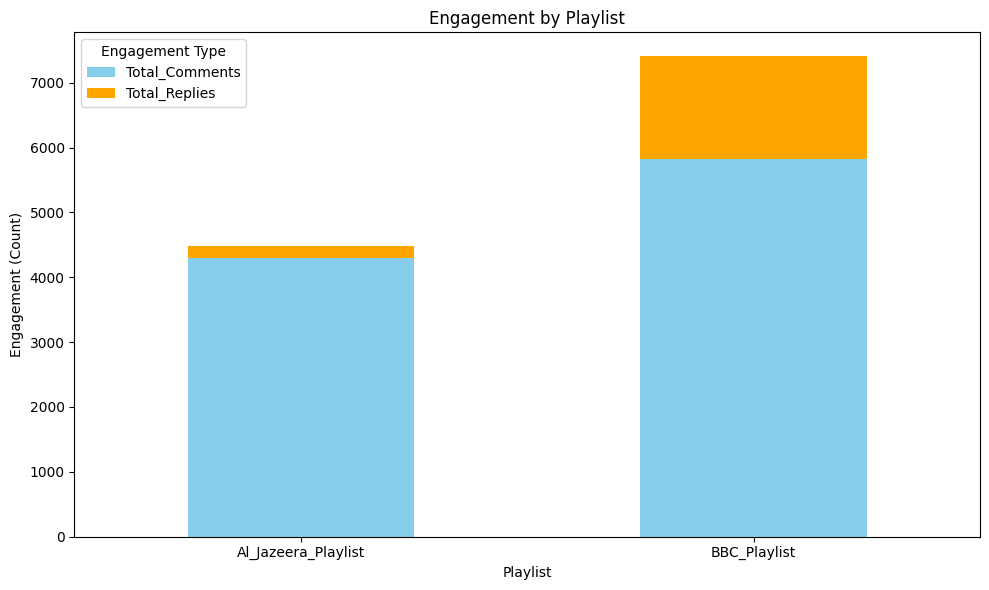

In [ ]:
#Group by playlist and calculate total comments and replies
engagement_summary = data.groupby('playlist').agg(
    Total_Comments=('comment_id', 'count'),  # Count total comments
    Total_Replies=('reply_author', lambda x: x.notna().sum())  # Count non-NaN replies
).reset_index()

#Add a column for total engagement (comments + replies)
engagement_summary['Total_Engagement'] = engagement_summary['Total_Comments'] + engagement_summary['Total_Replies']

print(engagement_summary)

engagement_summary.set_index('playlist')[['Total_Comments', 'Total_Replies']].plot(
    kind='bar', figsize=(10, 6), stacked=True, color=['skyblue', 'orange']
)
plt.title('Engagement by Playlist')
plt.xlabel('Playlist')
plt.ylabel('Engagement (Count)')
plt.legend(title='Engagement Type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Topic Modelling

In [ ]:
#NLTK stopwords
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')


lemmatizer = WordNetLemmatizer()

#Clean the text: convert to lowercase, remove URLs and HTML tags, special characters and numbers, tokenize words, and remove stopwords
def clean_text(text):
    """Clean the text by removing noise and unnecessary characters."""
    text = text.lower()

    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    text = re.sub(r'<.*?>', '', text)

    text = re.sub(r'[^a-zA-Z\s]', '', text)

    words = word_tokenize(text)

    words = [word for word in words if word not in stopwords.words('english')]

    words = [lemmatizer.lemmatize(word) for word in words]

    cleaned_text = ' '.join(words)

    return cleaned_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
#Split the datasets per playlist
bbc_data = data[data['playlist'] == 'BBC_Playlist']
aljazeera_data = data[data['playlist'] == 'Al_Jazeera_Playlist']

print(f"BBC News - Number of rows: {len(bbc_data)}")
print(f"Al Jazeera - Number of rows: {len(aljazeera_data)}")

BBC News - Number of rows: 5826
Al Jazeera - Number of rows: 4295


In [ ]:
#For BBC News
bbc_titles = bbc_data['title'].dropna().unique()
bbc_desc = bbc_data['description'].dropna().unique()
bbc_comments = bbc_data['comment_text'].dropna().tolist()
bbc_replies = bbc_data['reply_text'].dropna().tolist()
# For Al Jazeera
aljazeera_titles = aljazeera_data['title'].dropna().unique()
aljazeera_desc = aljazeera_data['description'].dropna().unique()
aljazeera_comments = aljazeera_data['comment_text'].dropna().tolist()
aljazeera_replies = aljazeera_data['reply_text'].dropna().tolist()


In [ ]:
#LDA topic modeling function
def lda_topic_modeling(cleaned_text, n_topics=5, n_top_words=10):
    vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
    term_matrix = vectorizer.fit_transform(cleaned_text)
    lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda_model.fit(term_matrix)

    words = np.array(vectorizer.get_feature_names_out())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_word_locs = (-topic_weights).argsort()[:n_top_words]
        topic_keywords.append(words[top_word_locs])

    topics_df = pd.DataFrame(topic_keywords, columns=[f'Word {i+1}' for i in range(n_top_words)])
    topics_df.index = [f'Topic {i+1}' for i in range(len(topic_keywords))]
    return topics_df, lda_model, vectorizer, term_matrix


## BBC News


In [ ]:
#Clean BBC News titles data
bbc_cleaned_titles = bbc_data['title'].dropna().apply(lambda x: clean_text(str(x))).unique()

#Clean BBC News videos description
bbc_cleaned_desc = bbc_data['description'].dropna().apply(lambda x: clean_text(str(x))).unique()

#Clean BBC News comments data
bbc_data['cleaned_comments'] = bbc_data['comment_text'].apply(lambda x: clean_text(str(x)))

#Convert BBC News comments data to a list
bbc_cleaned_comments = bbc_data['cleaned_comments'].dropna().tolist()

<ipython-input-11-ffb67dc60f0c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bbc_data['cleaned_comments'] = bbc_data['comment_text'].apply(lambda x: clean_text(str(x)))


In [ ]:
#Perform LDA topic modeling on BBC titles, descriptions, and comments
bbc_titles_topics, bbc_lda_model_titles, bbc_vectorizer_titles, bbc_term_matrix_titles = lda_topic_modeling(
    cleaned_text=bbc_cleaned_titles,
    n_topics=10,
    n_top_words=15
)

bbc_descriptions_topics, bbc_lda_model_desc, bbc_vectorizer_desc, bbc_term_matrix_desc = lda_topic_modeling(
    cleaned_text=bbc_cleaned_desc,
    n_topics=7,
    n_top_words=15
)

bbc_comments_topics, bbc_lda_model_comments, bbc_vectorizer_comments, bbc_term_matrix_comments = lda_topic_modeling(
    cleaned_text=bbc_cleaned_comments,
    n_topics=10,
    n_top_words=15
)

In [ ]:
def plot_topic_distance_pca(lda_model):
    #Extract topic-word distributions
    topic_word_matrix = lda_model.components_

    #Number of topics is inferred from the LDA model
    n_topics = lda_model.n_components

    #Reduce dimensions to 2D using PCA
    pca_model = PCA(n_components=2, random_state=42)
    pca_results = pca_model.fit_transform(topic_word_matrix)

    #Plot the 2D topic map
    plt.figure(figsize=(10, 8))
    plt.scatter(pca_results[:, 0], pca_results[:, 1], c='blue', edgecolor='k', s=200)

    for i in range(n_topics):
        plt.text(pca_results[i, 0], pca_results[i, 1], f'Topic {i+1}', fontsize=12, ha='center', va='center', color='white', bbox=dict(facecolor='blue', alpha=0.6))

    plt.title("Inter-Topic Distance Map (PCA)")
    plt.xlabel("PCA Dimension 1")
    plt.ylabel("PCA Dimension 2")
    plt.show()

###Titles

In [ ]:
bbc_titles_topics

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15
Topic 1,middle,east,trump,mean,ukraine,russia,leader,discus,donald,gaza,israeli,israel,say,netanyahu,war
Topic 2,gaza,israeli,aid,strike,say,israel,kill,school,northern,child,killed,war,netanyahu,ceasefire,palestinian
Topic 3,gaza,war,netanyahu,crime,attack,israeli,military,benjamin,like,child,israel,hostage,ceasefire,deal,say
Topic 4,israel,bank,hezbollah,war,donald,lebanon,middle,east,trump,mean,ceasefire,gaza,israeli,say,netanyahu
Topic 5,israeli,say,lebanon,strike,pm,gaza,official,hospital,kill,dozen,killed,netanyahu,beirut,release,hostage
Topic 6,deal,ceasefire,gaza,hostage,hamas,release,israel,israeli,talk,benjamin,discus,netanyahu,pm,war,say
Topic 7,beirut,israeli,killed,chief,strike,hezbollah,talk,ceasefire,gaza,israel,say,netanyahu,war,child,palestinian
Topic 8,gaza,child,israel,vote,airstrikes,say,ceasefire,israeli,netanyahu,war,palestinian,military,talk,northern,leader
Topic 9,israel,say,gaza,unrwa,ban,palestinian,northern,hospital,military,vote,chief,official,israeli,ceasefire,deal
Topic 10,ceasefire,gaza,talk,israel,deal,resume,qatar,like,dozen,kill,airstrikes,hamas,say,beirut,israeli


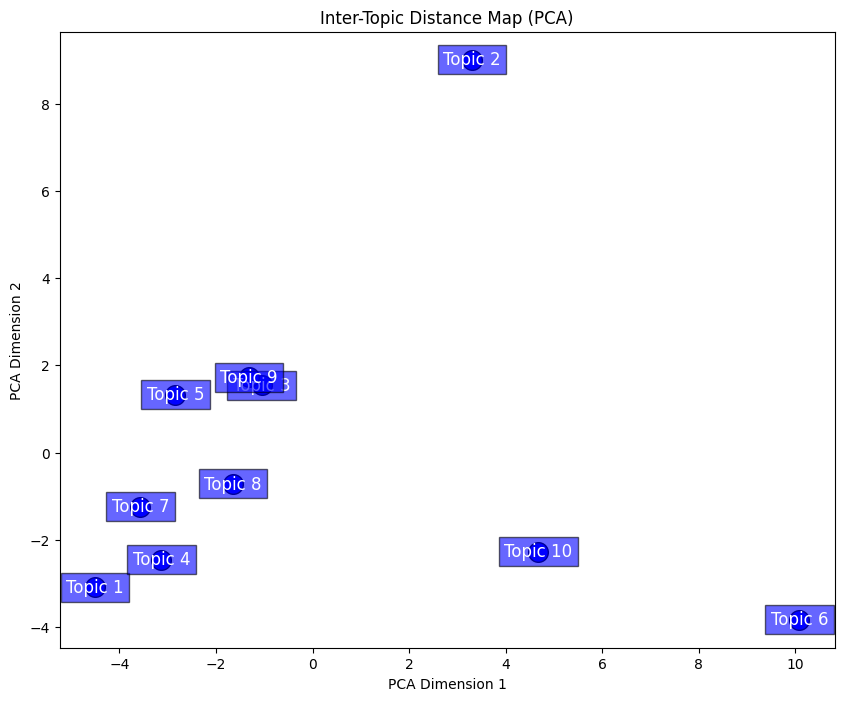

In [ ]:
plot_topic_distance_pca(bbc_lda_model_titles)

###Description

In [ ]:
bbc_descriptions_topics

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15
Topic 1,gaza,said,israeli,israel,ceasefire,minister,hamas,deal,prime,international,israels,netanyahu,strikes,killed,benjamin
Topic 2,syria,military,country,israel,regime,netanyahu,war,bbc,new,east,middle,way,policy,trade,mr
Topic 3,israel,gaza,hamas,israeli,said,deal,agency,killed,hostages,ceasefire,told,official,palestinian,says,strike
Topic 4,gaza,israel,hamas,israeli,said,hostages,ceasefire,deal,release,people,months,aid,palestinian,palestinians,bbc
Topic 5,israeli,military,said,hospital,area,terrorist,gave,targeting,gazas,comes,minutes,told,northern,killed,bbc
Topic 6,israel,gaza,lebanon,children,israeli,israels,united,agency,said,described,ban,comes,aid,according,nations
Topic 7,gaza,palestinian,israeli,war,israel,start,seen,group,bbc,strike,west,killed,bank,say,additional


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


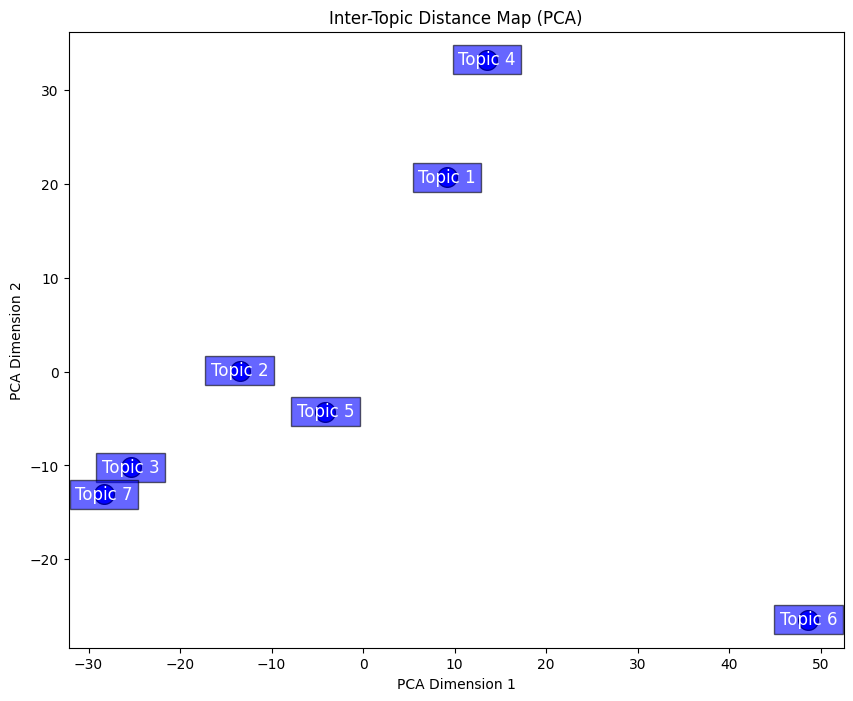

In [ ]:
plot_topic_distance_pca(bbc_lda_model_desc)

###Comments

In [ ]:
bbc_comments_topics

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19,Word 20
Topic 1,allah,know,bbc,izreal,israel,news,dont,people,law,owns,years,hamas,genocide,killed,kind,world,according,million,controls,state
Topic 2,god,say,want,people,lord,peace,father,thousand,come,matthew,analysis,shall,like,world,given,jesus,love,heaven,john,seen
Topic 3,bbc,trump,war,genocide,gaza,believe,people,usa,dont,isreal,shame,harris,disgusting,vote,stop,family,uk,government,said,america
Topic 4,land,years,people,israel,gaza,war,jews,palestinians,like,israeli,world,home,started,million,dont,countries,genocide,children,live,goal
Topic 5,bbc,war,israel,hamas,hostages,peace,like,palestinians,netanyahu,going,im,world,better,thats,make,crimes,doesnt,pay,hell,straight
Topic 6,href,world,gaza,israel,country,food,aid,war,need,people,human,humanity,power,terrorist,protect,trump,idf,uk,great,strip
Topic 7,year,people,israel,children,gaza,palestine,bbc,occupation,women,innocent,terrorists,palestinian,hamas,evil,lost,thing,genocide,long,th,hostages
Topic 8,bbc,hamas,trump,biden,news,war,propaganda,dont,media,quot,middle,fake,east,gazans,deal,credit,mention,netanyahu,complicit,time
Topic 9,israel,hamas,hostages,free,palestinian,stop,palestine,ceasefire,terrorist,innocent,dont,prisons,gaza,amp,people,aid,shame,release,islam,civilians
Topic 10,right,support,defend,occupation,gaza,people,trump,starmer,far,thank,jesus,white,left,english,palestinians,muhammad,children,surely,keir,blue


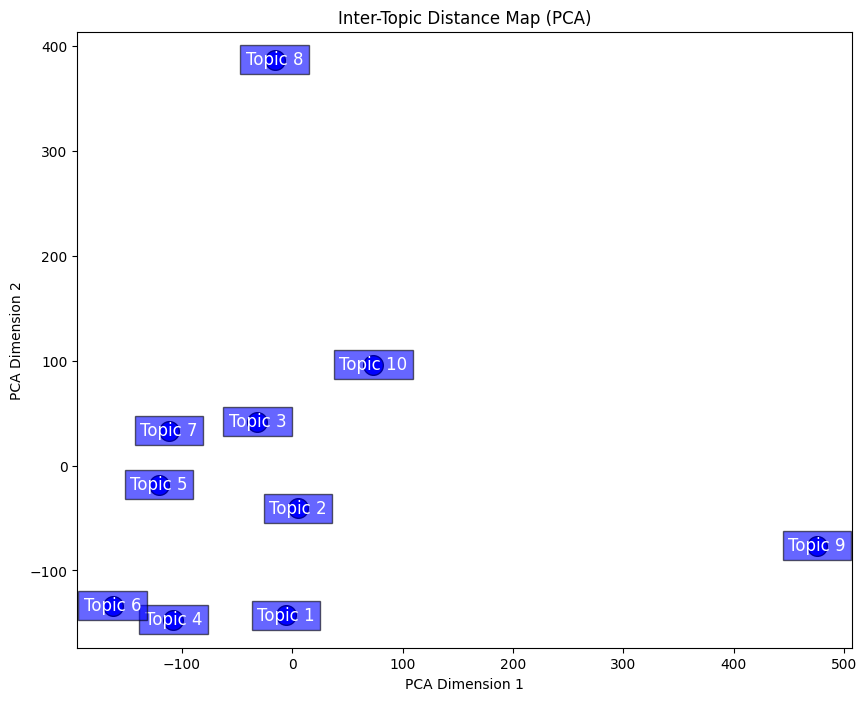

In [ ]:
plot_topic_distance_pca(bbc_lda_model_comments)

## Al Jazeera

In [ ]:
#Clean Al Jazeera titles data
aljazeera_cleaned_titles = aljazeera_data['title'].dropna().apply(lambda x: clean_text(str(x))).unique()

#Clean Al Jazeera description data
aljazeera_cleaned_desc = aljazeera_data['description'].dropna().apply(lambda x: clean_text(str(x))).unique()

#Clean Al Jazeera comments data
aljazeera_data['cleaned_comments'] = aljazeera_data['comment_text'].apply(lambda x: clean_text(str(x)))

#Convert Al Jazeera comments data to a list
aljazeera_cleaned_comments = aljazeera_data['cleaned_comments'].dropna().tolist()


<ipython-input-19-af06d4b2c10e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aljazeera_data['cleaned_comments'] = aljazeera_data['comment_text'].apply(lambda x: clean_text(str(x)))


In [ ]:
# Perform LDA topic modeling on Al Jazeera titles, descriptions, and comments
aljazeera_titles_topics, aljazeera_lda_model_titles, aljazeera_vectorizer_titles, aljazeera_term_matrix_titles = lda_topic_modeling(
    cleaned_text=aljazeera_cleaned_titles,
    n_topics=5,
    n_top_words=10
)

aljazeera_descriptions_topics, aljazeera_lda_model_desc, aljazeera_vectorizer_desc, aljazeera_term_matrix_desc = lda_topic_modeling(
    cleaned_text=aljazeera_cleaned_desc,
    n_topics=7,
    n_top_words=15
)

aljazeera_comments_topics, aljazeera_lda_model_comments, aljazeera_vectorizer_comments, aljazeera_term_matrix_comments = lda_topic_modeling(
    cleaned_text=aljazeera_cleaned_comments,
    n_topics=10,
    n_top_words=15
)


###Titles

In [ ]:
aljazeera_titles_topics

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10
Topic 1,analysis,double,standard,marwan,bishara,america,attack,ceasefire,aid,gaza
Topic 2,gaza,israeli,attack,hospital,israel,killed,northern,death,city,dawn
Topic 3,israel,gaza,protest,war,aid,student,military,risk,cut,shift
Topic 4,palestinian,israeli,solidarity,artist,music,school,gaza,creating,issue,displacement
Topic 5,gaza,war,israel,year,resilience,protester,medical,support,solidarity,ceasefire


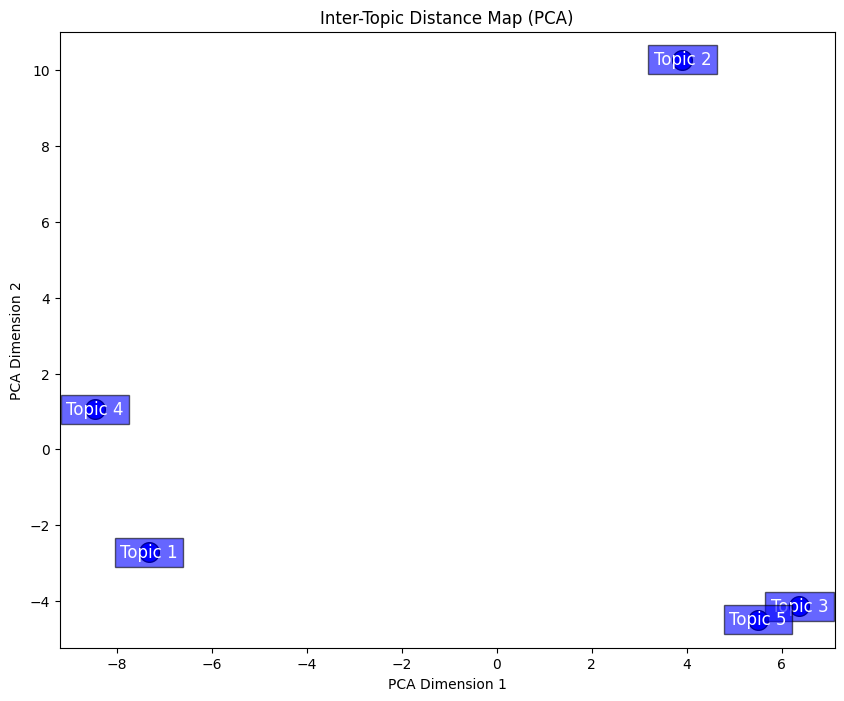

In [ ]:
plot_topic_distance_pca(aljazeera_lda_model_titles)

###Description

In [ ]:
aljazeera_descriptions_topics

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15
Topic 1,palestine,war,state,al,palestinian,united,month,help,spotlight,people,military,oneyearofgazawar,israelhamaswar,israelwar,israelgazawar
Topic 2,palestine,oneyearofgazawar,israelwar,israelgazawar,aljazeeraenglish,israelhamaswar,al,jazeeras,gazareporters,gazawarcoverage,report,gazajournalists,aljazeeragazajournalists,gazabombardment,gazaunderattack
Topic 3,palestinian,israeli,palestine,hospital,al,aljazeeraenglish,israelgazawar,killed,israelhamaswar,israelwar,gazaunderattack,gazahumanitariancrisis,oneyearofgazawar,attack,gazabombardment
Topic 4,israelgazawar,aljazeeraenglish,genocide,israelhamaswar,gazahumanitariancrisis,war,jazeeras,palestine,support,al,world,report,oneyearofgazawar,israelwar,gazaunderattack
Topic 5,palestine,gazahumanitariancrisis,gazaunderattack,jazeeras,al,israelhamaswar,secretary,alan,fisher,state,aid,israelwar,report,humanitarian,israeli
Topic 6,palestinian,bishara,providing,life,ongoing,aid,israelgazawar,aljazeeraenglish,al,unitedstates,humanitarian,gazagenocide,usforeignpolicy,joebiden,foreign
Topic 7,support,street,lost,genocide,showing,artist,expressing,solidarity,protest,people,europe,israelpalestinewar,gazasolidarityprotests,stopthegenocide,freepalestine


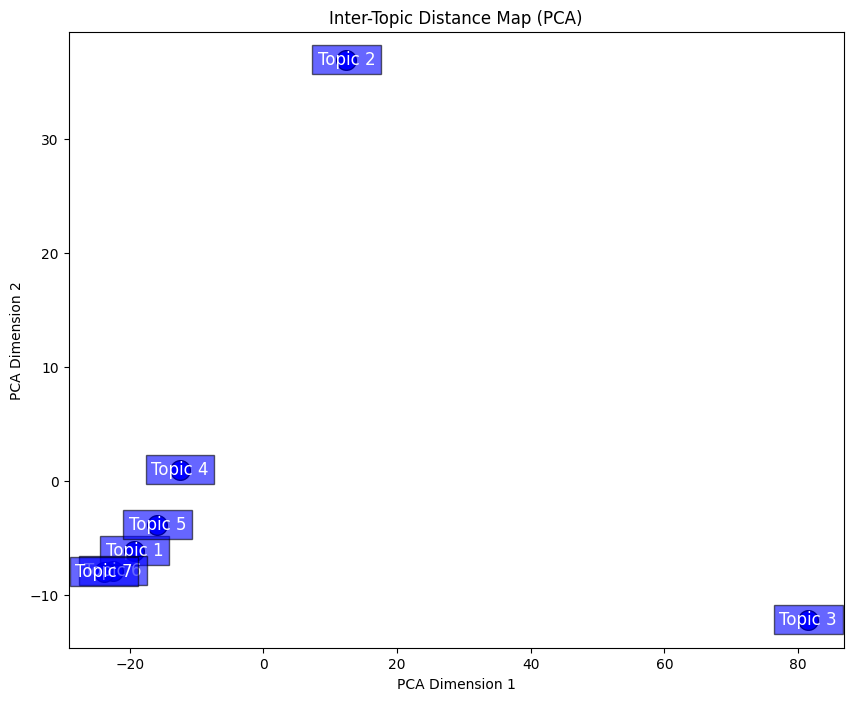

In [ ]:
plot_topic_distance_pca(aljazeera_lda_model_desc)

###Comments

In [ ]:
aljazeera_comments_topics

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15
Topic 1,allah,al,jazeera,people,october,th,oct,palestinian,hamas,qatar,beautiful,ya,help,world,remember
Topic 2,stop,genocide,gaza,god,family,israel,people,government,country,like,good,evil,war,palestine,bless
Topic 3,people,palestinian,terrorist,israel,gaza,got,love,iran,killed,support,world,civilian,north,usa,house
Topic 4,terrorist,law,france,middle,kid,east,youtube,israel,mind,tv,hamas,killing,illuminati,world,dr
Topic 5,israel,quotthey,arent,quot,state,war,arab,quotbut,cousinsquot,land,iran,right,theyre,nation,lebanon
Topic 6,israel,victim,card,gaza,dont,hamas,massacre,world,peace,people,like,think,weapon,let,america
Topic 7,israel,war,terrorist,world,usa,country,palestinian,america,people,genocide,hamas,support,state,dont,biden
Topic 8,hamas,war,channel,propaganda,people,hostage,thank,like,aljazeera,woman,dont,live,medium,aj,world
Topic 9,palestine,free,year,people,palestinian,iran,occupation,head,gaza,million,old,power,leader,talk,flag
Topic 10,israel,people,arab,protest,like,jewish,child,country,hate,good,europe,life,thing,israeli,germany


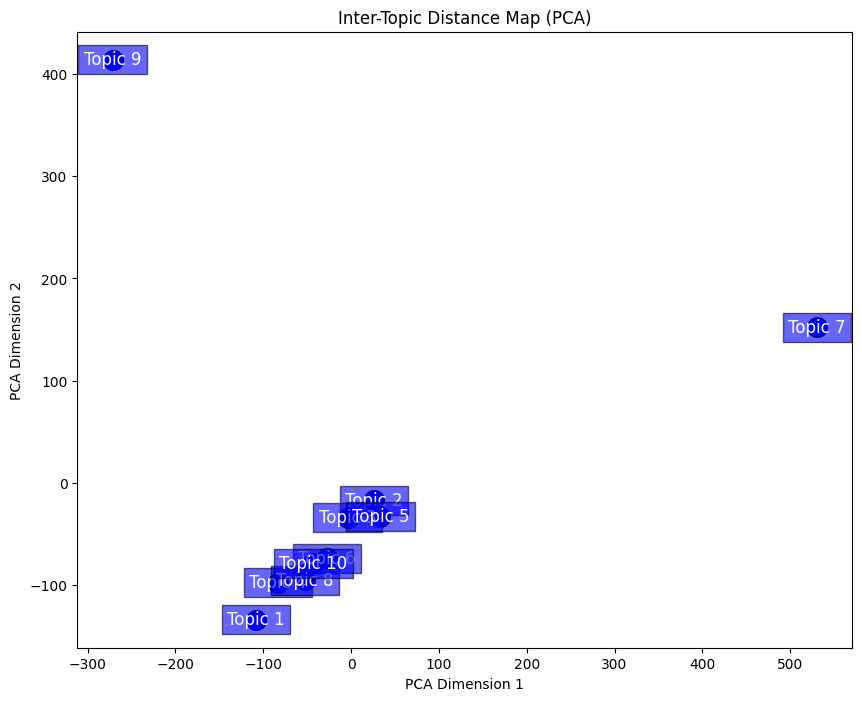

In [ ]:
plot_topic_distance_pca(aljazeera_lda_model_comments)

# Sentiment Analysis

##BBC News

### Titles Sentiment Analysis

In [ ]:
title_sentiment_bbc =bbc_data[(~data['title'].isna())]
#Remove duplicate values from the 'title' column , as the one video may be duplicated as it has many comments
title_sentiment_bbc = title_sentiment_bbc.drop_duplicates(subset=['title'])

#Calc sentiment score for each record
title_sentiment_bbc['title_sentiment'] = title_sentiment_bbc['title'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
#Assign sentiment category based on sentiment score
title_sentiment_bbc['title_sentiment_category'] = title_sentiment_bbc['title_sentiment'].apply(lambda x: 'Positive' if x > 0
                                                                                               else ('Negative' if x < 0 else 'Neutral'))

#Count the occurrences of each sentiment category
sentiment_counts = title_sentiment_bbc['title_sentiment_category'].value_counts()
sentiment_counts_df = sentiment_counts.reset_index()
sentiment_counts_df.columns = ['title_sentiment', 'Count']
sentiment_counts_df = sentiment_counts_df.sort_values(by='Count', ascending=False)
sentiment_counts_df.style.background_gradient(cmap='YlGnBu')

,title_sentiment,Count
0,Neutral,36
1,Positive,7
2,Negative,6


###Description Sentiment Analysis

In [ ]:
desc_sentiment_bbc =bbc_data[(~data['description'].isna())]
# Remove duplicate values from the 'description' column , as the one video may be duplicated as it has many comments
desc_sentiment_bbc = desc_sentiment_bbc.drop_duplicates(subset=['description'])

# Calc sentiment score for each record
desc_sentiment_bbc['desc_sentiment'] = desc_sentiment_bbc['description'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
# Assign sentiment category based on sentiment score
desc_sentiment_bbc['desc_sentiment_category'] = desc_sentiment_bbc['desc_sentiment'].apply(lambda x: 'Positive' if x > 0
                                                                                           else ('Negative' if x < 0 else 'Neutral'))
# Count the occurrences of each sentiment category
sentiment_counts = desc_sentiment_bbc['desc_sentiment_category'].value_counts()
sentiment_counts_df = sentiment_counts.reset_index()
sentiment_counts_df.columns = ['desc_sentiment', 'Count']
sentiment_counts_df = sentiment_counts_df.sort_values(by='Count', ascending=False)
sentiment_counts_df.style.background_gradient(cmap='YlGnBu')

,desc_sentiment,Count
0,Positive,39
1,Negative,8
2,Neutral,1


### Comments Sentiment Analysis

In [ ]:
comment_sentiment_bbc =bbc_data[(~data['comment_text'].isna())]
# Remove duplicate values from the 'comment_text' column , as the one video may be duplicated as it has many comments
comment_sentiment_bbc = comment_sentiment_bbc.drop_duplicates(subset=['comment_text'])

# Calc sentiment score for each record
comment_sentiment_bbc['comment_sentiment'] = comment_sentiment_bbc['comment_text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
# Assign sentiment category based on sentiment score
comment_sentiment_bbc['comment_sentiment_category'] = comment_sentiment_bbc['comment_sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Count the occurrences of each sentiment category
sentiment_counts = comment_sentiment_bbc['comment_sentiment_category'].value_counts()
sentiment_counts_df = sentiment_counts.reset_index()
sentiment_counts_df.columns = ['comment_sentiment', 'Count']
sentiment_counts_df = sentiment_counts_df.sort_values(by='Count', ascending=False)
sentiment_counts_df.style.background_gradient(cmap='YlGnBu')

,comment_sentiment,Count
0,Neutral,2145
1,Positive,1356
2,Negative,1156


##Al Jazeera

###Titles

In [ ]:
title_sentiment_aljazeera =aljazeera_data[(~data['title'].isna())]
#Remove duplicate values from the 'title' column , as the one video may be duplicated as it has many comments
title_sentiment_aljazeera = title_sentiment_aljazeera.drop_duplicates(subset=['title'])

#Calc sentiment score for each record
title_sentiment_aljazeera['title_sentiment'] = title_sentiment_aljazeera['title'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
#Assign sentiment category based on sentiment score
title_sentiment_aljazeera['title_sentiment_category'] = title_sentiment_aljazeera['title_sentiment'].apply(lambda x: 'Positive' if x > 0
                                                                                               else ('Negative' if x < 0 else 'Neutral'))

#Count the occurrences of each sentiment category
sentiment_counts = title_sentiment_aljazeera['title_sentiment_category'].value_counts()
sentiment_counts_df = sentiment_counts.reset_index()
sentiment_counts_df.columns = ['title_sentiment', 'Count']
sentiment_counts_df = sentiment_counts_df.sort_values(by='Count', ascending=False)
sentiment_counts_df.style.background_gradient(cmap='YlGnBu')

,title_sentiment,Count
0,Neutral,30
1,Negative,12
2,Positive,8


###Description

In [ ]:
desc_sentiment_aljazeera =aljazeera_data[(~data['description'].isna())]
#Remove duplicate values from the 'description' column , as the one video may be duplicated as it has many comments
desc_sentiment_aljazeera = desc_sentiment_aljazeera.drop_duplicates(subset=['description'])

#Calc sentiment score for each record
desc_sentiment_aljazeera['desc_sentiment'] = desc_sentiment_aljazeera['description'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
#Assign sentiment category based on sentiment score
desc_sentiment_aljazeera['desc_sentiment_category'] = desc_sentiment_aljazeera['desc_sentiment'].apply(lambda x: 'Positive' if x > 0
                                                                                               else ('Negative' if x < 0 else 'Neutral'))
#Count the occurrences of each sentiment category
sentiment_counts = desc_sentiment_aljazeera['desc_sentiment_category'].value_counts()
sentiment_counts_df = sentiment_counts.reset_index()
sentiment_counts_df.columns = ['desc_sentiment', 'Count']
sentiment_counts_df = sentiment_counts_df.sort_values(by='Count', ascending=False)
sentiment_counts_df.style.background_gradient(cmap='YlGnBu')

,desc_sentiment,Count
0,Positive,28
1,Negative,17
2,Neutral,5


###Comments

In [ ]:
comment_sentiment_aljazeera =aljazeera_data[(~data['comment_text'].isna())]
#Remove duplicate values from the 'comment_text' column , as the one video may be duplicated as it has many comments
comment_sentiment_aljazeera = comment_sentiment_aljazeera.drop_duplicates(subset=['comment_text'])

#Calc sentiment score for each record
comment_sentiment_aljazeera['comment_sentiment'] = comment_sentiment_aljazeera['comment_text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
#Assign sentiment category based on sentiment score
comment_sentiment_aljazeera['comment_sentiment_category'] = comment_sentiment_aljazeera['comment_sentiment'].apply(lambda x: 'Positive' if x > 0
                                                                                               else ('Negative' if x < 0 else 'Neutral'))
#Count the occurrences of each sentiment category
sentiment_counts = comment_sentiment_aljazeera['comment_sentiment_category'].value_counts()
sentiment_counts_df = sentiment_counts.reset_index()
sentiment_counts_df.columns = ['comment_sentiment', 'Count']
sentiment_counts_df = sentiment_counts_df.sort_values(by='Count', ascending=False)
sentiment_counts_df.style.background_gradient(cmap='YlGnBu')

,comment_sentiment,Count
0,Neutral,1880
1,Positive,1287
2,Negative,848


###Primary Emotions in Comments

In [ ]:
#Drop duplicates for comments to analyze unique ones only
unique_comment = data[['comment_text', 'playlist']].drop_duplicates()

#Pre-trained emotion detection pipeline from HuggingFace
emotion_pipeline = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)

#Emotion detection on text
def detect_emotions(text):
    try:
        emotions = emotion_pipeline(str(text))
        return {item['label']: item['score'] for item in emotions[0]}
    except Exception as e:
        return {}

#Emotion detection to titles
unique_comment['emotions'] = unique_comment['comment_text'].apply(detect_emotions)

#The most prominent emotion
unique_comment['primary_emotion'] = unique_comment['emotions'].apply(lambda x: max(x, key=x.get) if x else None)

#Primary emotions by playlist
playlist_emotion_counts = unique_comment.groupby(['playlist', 'primary_emotion']).size().reset_index(name='Count')

playlist_emotion_counts.sort_values(by=['playlist', 'Count'], ascending=[True, False], inplace=True)
playlist_emotion_counts

config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cpu
Token indices sequence length is longer than the specified maximum sequence length for this model (1197 > 512). Running this sequence through the model will result in indexing errors


,playlist,primary_emotion,Count
4,Al_Jazeera_Playlist,neutral,1544
0,Al_Jazeera_Playlist,anger,830
1,Al_Jazeera_Playlist,disgust,417
5,Al_Jazeera_Playlist,sadness,352
2,Al_Jazeera_Playlist,fear,312
3,Al_Jazeera_Playlist,joy,304
6,Al_Jazeera_Playlist,surprise,237
11,BBC_Playlist,neutral,1611
7,BBC_Playlist,anger,1037
8,BBC_Playlist,disgust,639


In [ ]:
#Example comments with their primary emotion
example_comments = unique_comment[['comment_text', 'primary_emotion']].dropna().head(10)
example_comments

,comment_text,primary_emotion
0,"No they haven’t, it’s yet to be voted on.<br><br>BBC once again only showing the glitter on the turd when it comes to Israel",neutral
1,Satanyahu will probably change his mind by tomorrow,neutral
2,ICC is waiting. Not one brave person in Israel to take him to Hague?,neutral
3,🌏🌐✋👈<br>God bless you 👍,joy
4,Thank goodness their gonna free them they&#39;ve had them since last year.😢😢,joy
5,"cant beleive this is up for debate, do these israelis really wanna prolong the war? maybe they ought to spend a day in the shoes of those suffering for them to get it through their thick head",sadness
6,Peace and good life to palestinians from all my heart,joy
7,"Bbc put out to much missinformation, can&#39;t believe them anymore",surprise
8,"When the US weilds the stick, the Israeli government capitulates which goes to show what the hell Biden, Blinken, Jake Sullivan, Brett McGurk and Amos Hochstein&#39;s aims were all along. Were they just naive, weak or in the pockets or under the complete influence of Zionists?",anger
9,Mouslimes know only kidnap hostages 😅,neutral


###Further Sentiment Analysis Using VADER

In [ ]:
#VADER SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#Function to calculate sentiment intensity
def calculate_intensity(text):
    try:
        scores = analyzer.polarity_scores(str(text))
        return scores['compound']  # Compound score reflects sentiment intensity (-1 to 1)
    except Exception:
        return None

#Function to categorize intensity into a 1-5 scale
def intensity_category(score):
    if score is None:
        return None
    elif score <= -0.6:
        return 1  # Strongly Negative
    elif -0.6 < score <= -0.2:
        return 2  # Negative
    elif -0.2 < score <= 0.2:
        return 3  # Neutral
    elif 0.2 < score <= 0.6:
        return 4  # Positive
    else:
        return 5  # Strongly Positive

In [ ]:
unique_title = data[['title', 'playlist']].drop_duplicates()
unique_title['title_intensity'] = unique_title['title'].apply(calculate_intensity)
unique_title['title_intensity_category'] = unique_title['title_intensity'].apply(intensity_category)

#Group by playlist for comments
title_intensity_summary = unique_title.groupby(['playlist', 'title_intensity_category']).size().reset_index(name='Count')

print("\nTitle Intensity Summary:")
print(title_intensity_summary)



Title Intensity Summary:
              playlist  title_intensity_category  Count
0  Al_Jazeera_Playlist                         1     12
1  Al_Jazeera_Playlist                         2     14
2  Al_Jazeera_Playlist                         3     15
3  Al_Jazeera_Playlist                         4      6
4  Al_Jazeera_Playlist                         5      3
5         BBC_Playlist                         1     14
6         BBC_Playlist                         2     10
7         BBC_Playlist                         3     20
8         BBC_Playlist                         4      5


In [ ]:
unique_comment['comment_intensity'] = unique_comment['comment_text'].apply(calculate_intensity)
unique_comment['comment_intensity_category'] = unique_comment['comment_intensity'].apply(intensity_category)

#Aggregate and group by playlist for comments
comment_intensity_summary = unique_comment.groupby(['playlist', 'comment_intensity_category']).size().reset_index(name='Count')

print("\nComment Intensity Summary:")
print(comment_intensity_summary)


Comment Intensity Summary:
              playlist  comment_intensity_category  Count
0  Al_Jazeera_Playlist                           1    805
1  Al_Jazeera_Playlist                           2    711
2  Al_Jazeera_Playlist                           3   1106
3  Al_Jazeera_Playlist                           4    674
4  Al_Jazeera_Playlist                           5    719
5         BBC_Playlist                           1   1142
6         BBC_Playlist                           2    954
7         BBC_Playlist                           3   1377
8         BBC_Playlist                           4    639
9         BBC_Playlist                           5    545


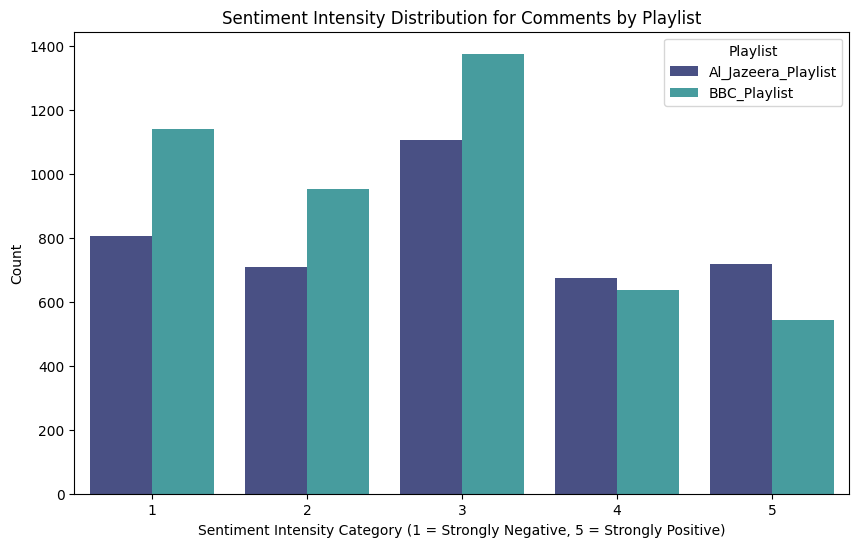

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=comment_intensity_summary, x="comment_intensity_category", y="Count", hue="playlist", palette="mako")
plt.title("Sentiment Intensity Distribution for Comments by Playlist")
plt.xlabel("Sentiment Intensity Category (1 = Strongly Negative, 5 = Strongly Positive)")
plt.ylabel("Count")
plt.legend(title="Playlist")
plt.show()

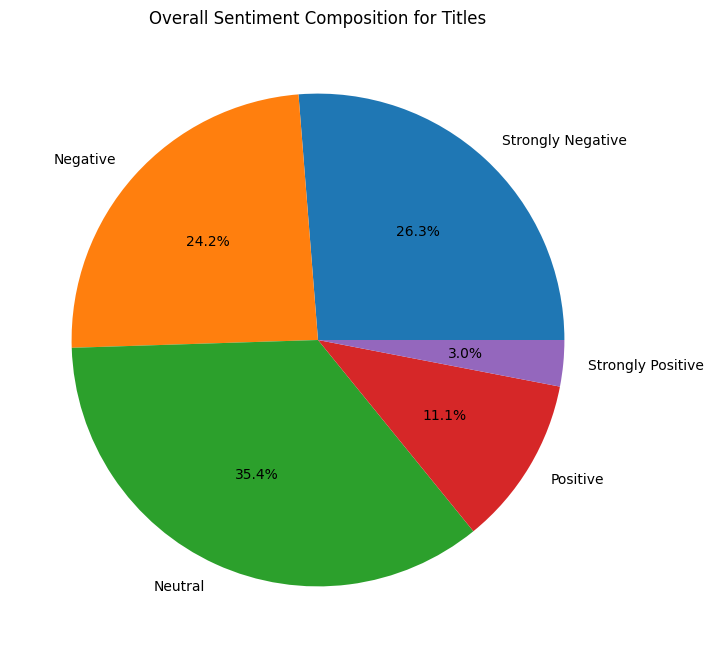

In [ ]:
title_counts = title_intensity_summary.groupby("title_intensity_category").sum()["Count"]
plt.figure(figsize=(8, 8))
title_counts.plot(kind="pie", autopct='%1.1f%%', labels=["Strongly Negative", "Negative", "Neutral", "Positive", "Strongly Positive"])
plt.title("Overall Sentiment Composition for Titles")
plt.ylabel("")
plt.show()

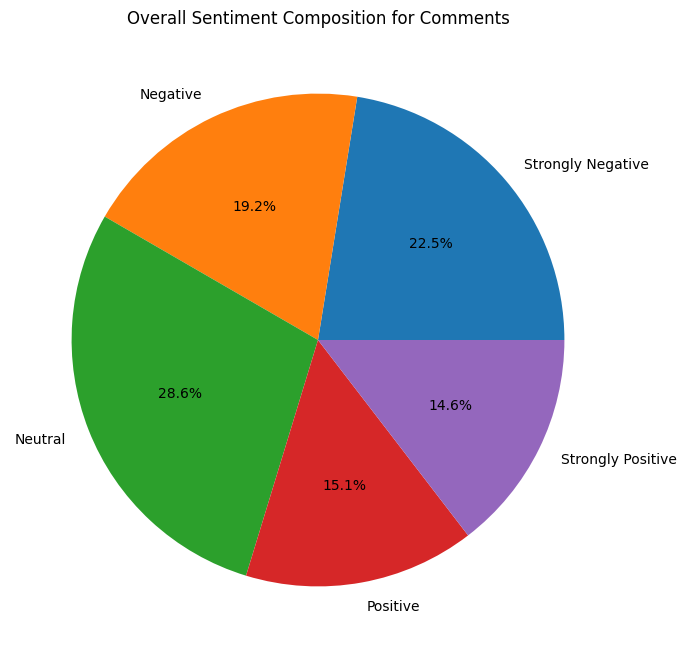

In [ ]:
comment_counts = comment_intensity_summary.groupby("comment_intensity_category").sum()["Count"]
plt.figure(figsize=(8, 8))
comment_counts.plot(kind="pie", autopct='%1.1f%%', labels=["Strongly Negative", "Negative", "Neutral", "Positive", "Strongly Positive"])
plt.title("Overall Sentiment Composition for Comments")
plt.ylabel("")
plt.show()

# Network Analysis

##User Interaction Network

###BBC News

In [ ]:
#Filter relevant columns for user interaction network
bbc_interaction_data = bbc_data[['comment_author', 'reply_author']].dropna()

#Create edges for the graph (comment_author -> reply_author)
edges = bbc_interaction_data.values.tolist()

G_bbc = nx.DiGraph()
G_bbc.add_edges_from(edges)

#Centrality measures
degree_centrality = nx.degree_centrality(G_bbc)
betweenness_centrality = nx.betweenness_centrality(G_bbc)
communities = list(nx.algorithms.community.greedy_modularity_communities(G_bbc))

comment_in_degree = nx.in_degree_centrality(G_bbc)  #Centrality for engaging comments
top_comments = sorted(comment_in_degree.items(), key=lambda x: x[1], reverse=True)[:10]  #Top 10 comments

#Network characteristics
bbc_network_summary = {
    "Number of nodes": G_bbc.number_of_nodes(),
    "Number of edges": G_bbc.number_of_edges(),
    "Average degree centrality": sum(degree_centrality.values()) / len(degree_centrality),
    "Average betweenness centrality": sum(betweenness_centrality.values()) / len(betweenness_centrality),
    "Number of communities detected": len(communities)
}

bbc_network_summary


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



{'Number of nodes': 1121,
 'Number of edges': 1261,
 'Average degree centrality': 0.002008729450745537,
 'Average betweenness centrality': 2.1908613493109334e-06,
 'Number of communities detected': 157}

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



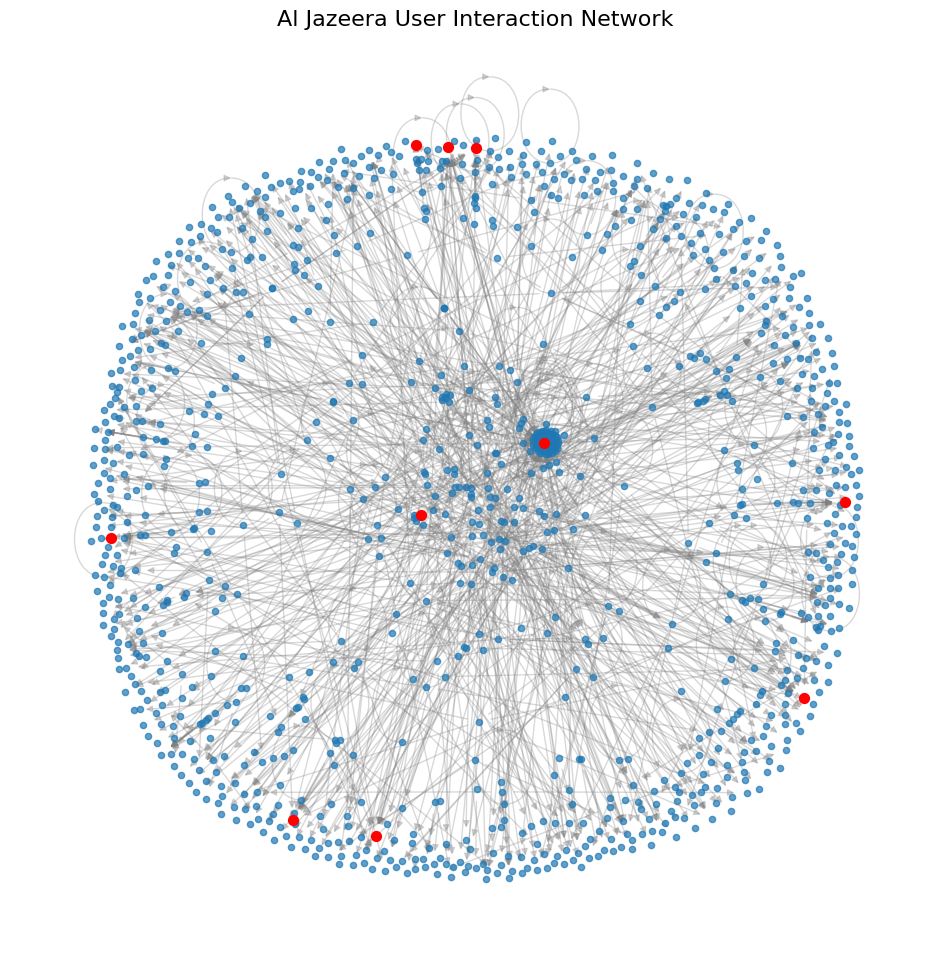

In [ ]:
#Visualize the network
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G_bbc, seed=42)

nx.draw_networkx_nodes(G_bbc, pos, node_size=20, alpha=0.7)
nx.draw_networkx_edges(G_bbc, pos, alpha=0.3, edge_color='gray', arrows=True)

# Highlight top engaging comments
top_comment_nodes = [node for node, _ in top_comments]
nx.draw_networkx_nodes(
    G_bbc, pos, nodelist=top_comment_nodes, node_size=50, node_color='red', label="Top Comments"
)
plt.title("BBC News User Interaction Network", fontsize=16)
plt.axis('off')
plt.show()

###Al Jazeera

In [ ]:
#Filter relevant columns for user interaction network
aljazeera_interaction_data = aljazeera_data[['comment_author', 'reply_author']].dropna()

#Create edges for the graph (comment_author -> reply_author)
edges = aljazeera_interaction_data.values.tolist()

G_aljazeera = nx.DiGraph()
G_aljazeera.add_edges_from(edges)

#Centrality measures
degree_centrality = nx.degree_centrality(G_aljazeera)
betweenness_centrality = nx.betweenness_centrality(G_aljazeera)
communities = list(nx.algorithms.community.greedy_modularity_communities(G_aljazeera))

comment_in_degree = nx.in_degree_centrality(G_aljazeera)
top_comments = sorted(comment_in_degree.items(), key=lambda x: x[1], reverse=True)[:10]

#Network characteristics
aljazeera_network_summary = {
    "Number of nodes": G_aljazeera.number_of_nodes(),
    "Number of edges": G_aljazeera.number_of_edges(),
    "Average degree centrality": sum(degree_centrality.values()) / len(degree_centrality),
    "Average betweenness centrality": sum(betweenness_centrality.values()) / len(betweenness_centrality),
    "Number of communities detected": len(communities)
}

aljazeera_network_summary


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



{'Number of nodes': 145,
 'Number of edges': 141,
 'Average degree centrality': 0.013505747126436762,
 'Average betweenness centrality': 2.3443988961230343e-06,
 'Number of communities detected': 25}

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



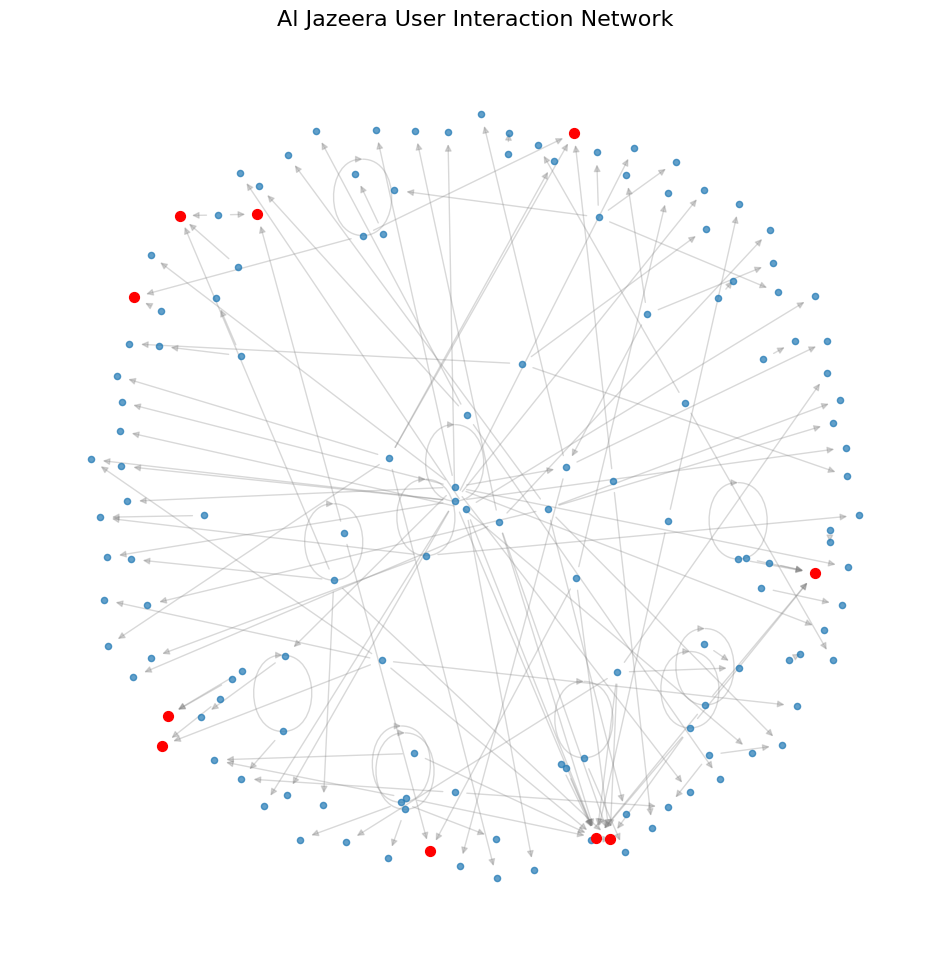

In [ ]:
#Visualize the network
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G_aljazeera, seed=42)

nx.draw_networkx_nodes(G_aljazeera, pos, node_size=20, alpha=0.7)
nx.draw_networkx_edges(G_aljazeera, pos, alpha=0.3, edge_color='gray', arrows=True)

#Highlight top engaging comments
top_comment_nodes = [node for node, _ in top_comments]
nx.draw_networkx_nodes(
    G_aljazeera, pos, nodelist=top_comment_nodes, node_size=50, node_color='red', label="Top Comments"
)

plt.title("Al Jazeera User Interaction Network", fontsize=16)
plt.axis('off')
plt.show()

##Topic Comparison: BBC News vs Al Jazeera

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



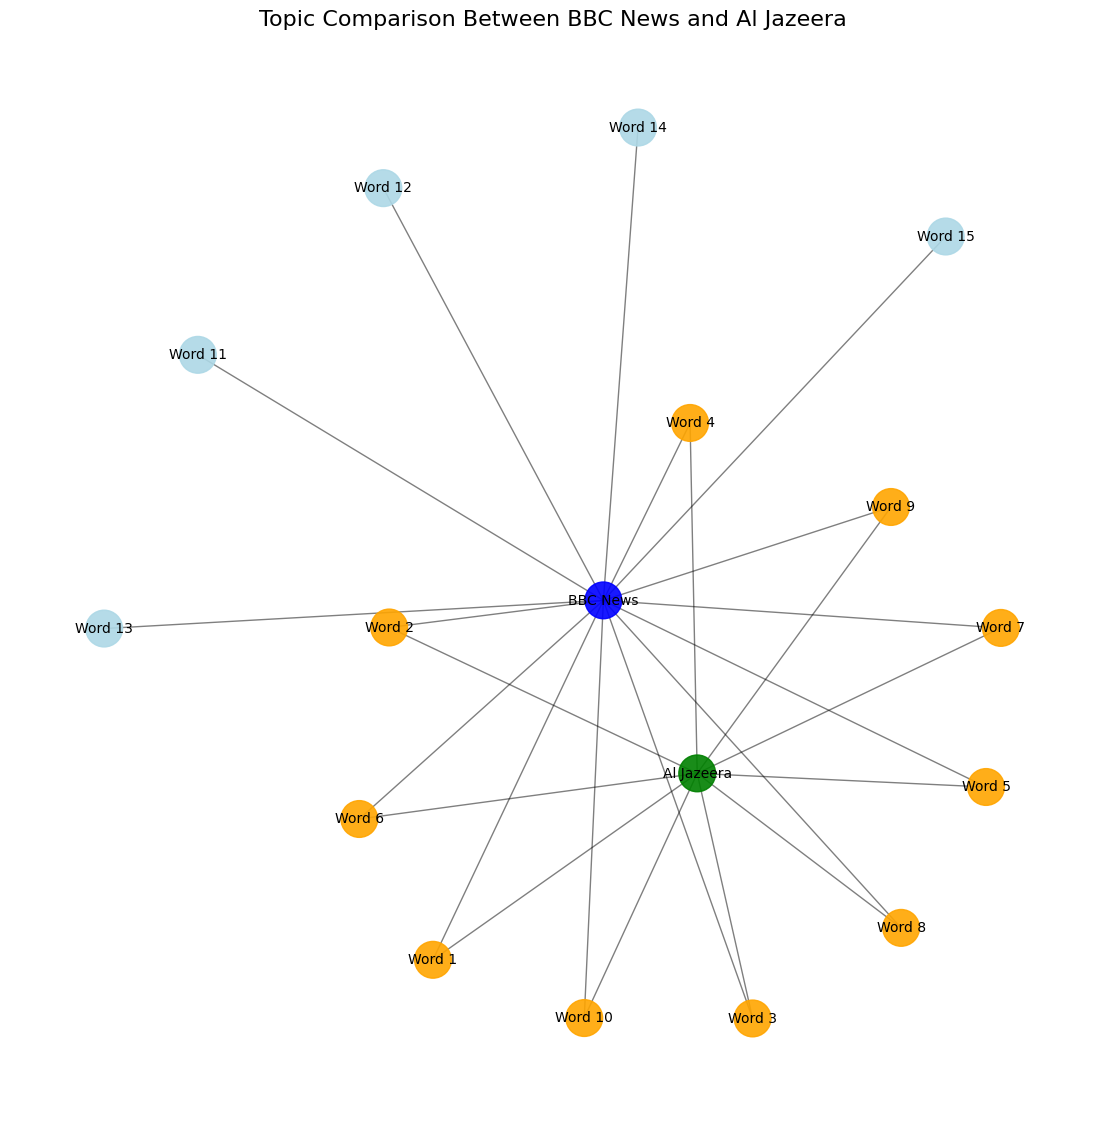

{'Unique to BBC': ['Word 13', 'Word 11', 'Word 14', 'Word 12', 'Word 15'], 'Unique to Al Jazeera': [], 'Shared Topics': ['Word 1', 'Word 7', 'Word 10', 'Word 8', 'Word 6', 'Word 9', 'Word 2', 'Word 3', 'Word 5', 'Word 4']}


In [ ]:
bbc_topics = set(bbc_titles_topics.keys())  # Topics from BBC
aljazeera_topics = set(aljazeera_titles_topics.keys())  # Topics from Al Jazeera

#Identify unique and shared topics
unique_bbc_topics = bbc_topics - aljazeera_topics  # Topics unique to BBC
unique_aljazeera_topics = aljazeera_topics - bbc_topics  # Topics unique to Al Jazeera
shared_topics = bbc_topics & aljazeera_topics  # Topics shared between the two

G_topics_comparison = nx.Graph()

#Add nodes for the two playlists
G_topics_comparison.add_node('BBC News', type='playlist', color='blue')
G_topics_comparison.add_node('Al Jazeera', type='playlist', color='green')

#Add nodes for topics and link to corresponding playlists
#Unique BBC topics
for topic in unique_bbc_topics:
    G_topics_comparison.add_node(topic, type='topic', color='lightblue')
    G_topics_comparison.add_edge('BBC News', topic, weight=1)

#Unique Al Jazeera topics
for topic in unique_aljazeera_topics:
    G_topics_comparison.add_node(topic, type='topic', color='lightgreen')
    G_topics_comparison.add_edge('Al Jazeera', topic, weight=1)

#Shared topics
for topic in shared_topics:
    G_topics_comparison.add_node(topic, type='topic', color='orange')
    G_topics_comparison.add_edge('BBC News', topic, weight=1)
    G_topics_comparison.add_edge('Al Jazeera', topic, weight=1)

plt.figure(figsize=(14, 14))
pos = nx.spring_layout(G_topics_comparison, seed=42)  # Use spring layout for better positioning

node_colors = [G_topics_comparison.nodes[node]['color'] for node in G_topics_comparison.nodes]

nx.draw_networkx_nodes(G_topics_comparison, pos, node_size=700, node_color=node_colors, alpha=0.9)
nx.draw_networkx_edges(G_topics_comparison, pos, alpha=0.5)

nx.draw_networkx_labels(G_topics_comparison, pos, font_size=10, font_color="black")

plt.title("Topic Comparison Between BBC News and Al Jazeera (Titles)", fontsize=16)
plt.axis("off")
plt.show()

summary = {
    "Unique to BBC": list(unique_bbc_topics),
    "Unique to Al Jazeera": list(unique_aljazeera_topics),
    "Shared Topics": list(shared_topics)
}

print(summary)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



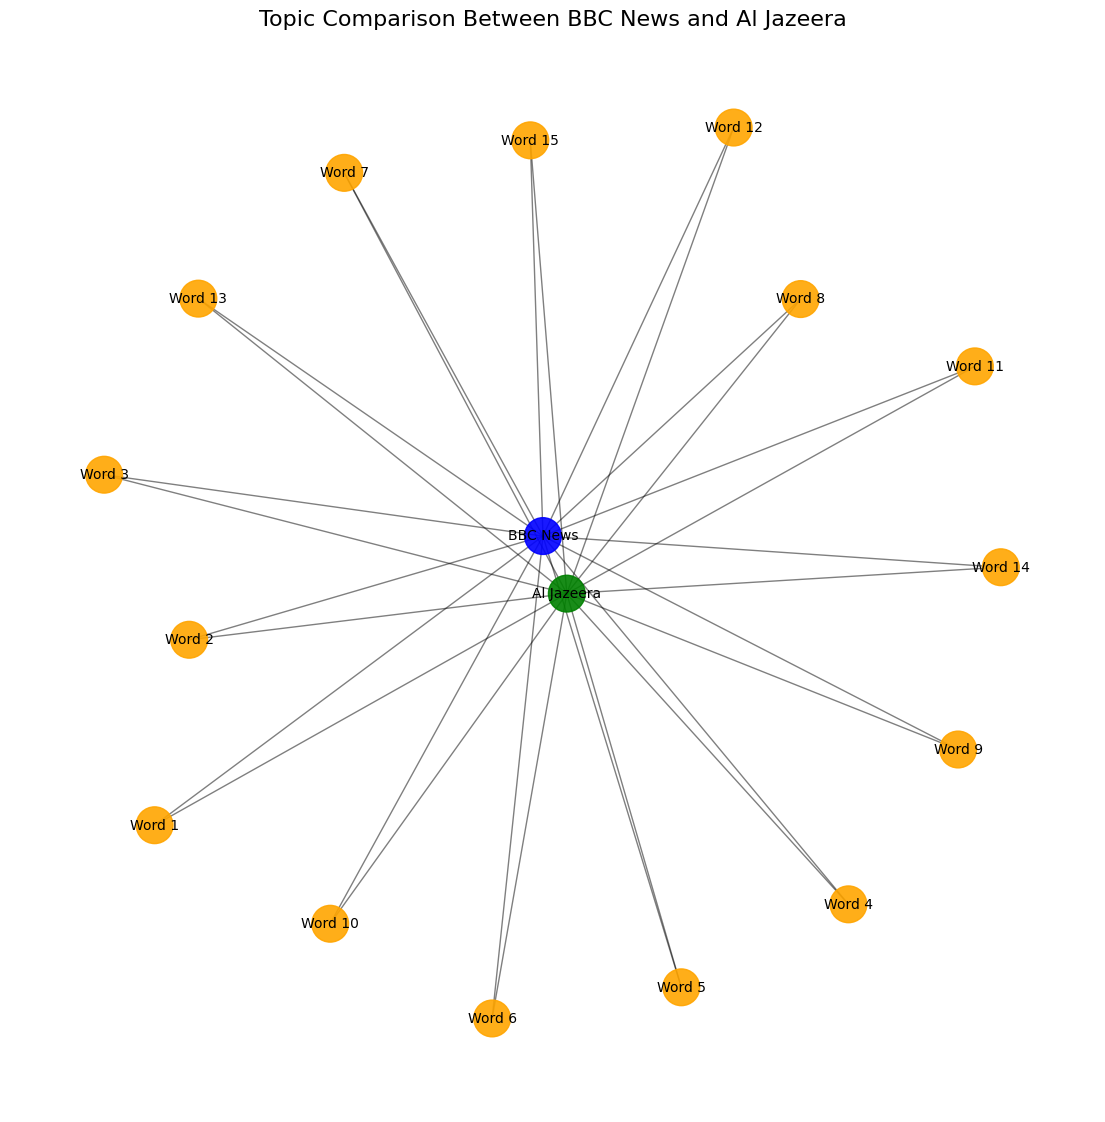

{'Unique to BBC': [], 'Unique to Al Jazeera': [], 'Shared Topics': ['Word 1', 'Word 13', 'Word 11', 'Word 7', 'Word 14', 'Word 10', 'Word 8', 'Word 6', 'Word 9', 'Word 2', 'Word 12', 'Word 3', 'Word 5', 'Word 4', 'Word 15']}


In [ ]:

bbc_topics = set(bbc_comments_topics.keys())  # Topics from BBC
aljazeera_topics = set(aljazeera_comments_topics.keys())  # Topics from Al Jazeera

unique_bbc_topics = bbc_topics - aljazeera_topics  # Topics unique to BBC
unique_aljazeera_topics = aljazeera_topics - bbc_topics  # Topics unique to Al Jazeera
shared_topics = bbc_topics & aljazeera_topics  # Topics shared between the two

G_topics_comparison = nx.Graph()

#Add nodes for the two playlists
G_topics_comparison.add_node('BBC News', type='playlist', color='blue')
G_topics_comparison.add_node('Al Jazeera', type='playlist', color='green')

#Add nodes for topics and link to corresponding playlists
# Unique BBC topics
for topic in unique_bbc_topics:
    G_topics_comparison.add_node(topic, type='topic', color='lightblue')
    G_topics_comparison.add_edge('BBC News', topic, weight=1)

#Unique Al Jazeera topics
for topic in unique_aljazeera_topics:
    G_topics_comparison.add_node(topic, type='topic', color='lightgreen')
    G_topics_comparison.add_edge('Al Jazeera', topic, weight=1)

#Shared topics
for topic in shared_topics:
    G_topics_comparison.add_node(topic, type='topic', color='orange')
    G_topics_comparison.add_edge('BBC News', topic, weight=1)
    G_topics_comparison.add_edge('Al Jazeera', topic, weight=1)

plt.figure(figsize=(14, 14))
pos = nx.spring_layout(G_topics_comparison, seed=42)  # Use spring layout for better positioning

node_colors = [G_topics_comparison.nodes[node]['color'] for node in G_topics_comparison.nodes]

nx.draw_networkx_nodes(G_topics_comparison, pos, node_size=700, node_color=node_colors, alpha=0.9)
nx.draw_networkx_edges(G_topics_comparison, pos, alpha=0.5)

nx.draw_networkx_labels(G_topics_comparison, pos, font_size=10, font_color="black")

plt.title("Topic Comparison Between BBC News and Al Jazeera (Comments)", fontsize=16)
plt.axis("off")
plt.show()

summary = {
    "Unique to BBC": list(unique_bbc_topics),
    "Unique to Al Jazeera": list(unique_aljazeera_topics),
    "Shared Topics": list(shared_topics)
}

# Print or return the summary
print(summary)
